## `spafe.fbanks.bark_fbanks`

- Description : Bark filter banks implementation.
- Copyright (c) 2019-2022 Ayoub Malek. This source code is licensed under the terms of the BSD 3-Clause License. For a copy, see <[https://github.com/SuperKogito/spafe/blob/master/LICENSE](https://github.com/SuperKogito/spafe/blob/master/LICENSE)\>.



- 函数功能：Bark 滤波器组的实现

`spafe.fbanks.bark_fbanks.Fm(fb, fc)`：

在 `Bark` 中的某个中心频率周围计算 `Bark` 滤波器

参数：

- `fb (int)`：在 Bark 中的频率
- `fc (int)`：在 Bark 中的中心频率

返回值：

- 与 Bark 滤波器相关的值/振幅（float）

`spafe.fbanks.bark_fbanks.bark_filter_banks(nfilts=24, nfft=512, fs=16000, low_freq=0, high_freq=None, scale='constant', conversion_approach='Wang')`

计算 Bark 滤波器组。滤波器参数以行（row）的形式存在返回值中，返回值的列对应于 FFT 的频带（bins）。

参数：

- `nfilts (int)`：滤波器组中的滤波器的数目，默认为20
- `nfft (int)`：FTT尺寸，默认为512
- `fs (int)`：采样率/信号采样频率，默认为16000Hz
- `low_freq (int)`：`mel` 滤波器的最低频带边缘，默认为 0Hz
- `high_freq (int)`：滤波器的最低频带边缘，默认为 fs / 2
- `scale (str)`：滤波器组的单调性行为，默认为`constant`
- `conversion_approach (str)`：Bark 尺度转换方法，默认为 `Wang`

返回值：

- `(numpy.ndarray)`：包含滤波器组的 numpy 数组，其尺寸为 `滤波器数目 * (nfft / 2 + 1)`，每个行存储一个滤波器
- `(numpy.ndarray)`：中心频率的数组


**注意：**
> - `scale`：除了 `constant`，还可以设置为 `ascendant`、`descendant`
> - `conversion_approach`：除了 `Wang` 还可以设置为 `Tjomov`、`Schroeder`、`Terhardt`、`Zwicker`、`Traunmueller`

参考文献：Hermansky, H. “Perceptual linear predictive (PLP) analysis of speech.” The Journal of the Acoustical Society of America 87 4 (1990): 1738-52 doi: 10.1121/1.399423. PMID: 2341679.

下面为代码实现示例：

/home/liang/miniconda3/envs/pyannote/lib/python3.8/site-packages/spafe/utils/converters.py:68: RuntimeWarning: invalid value encountered in log10
  return A * np.log10(1 + f * 0.00437)


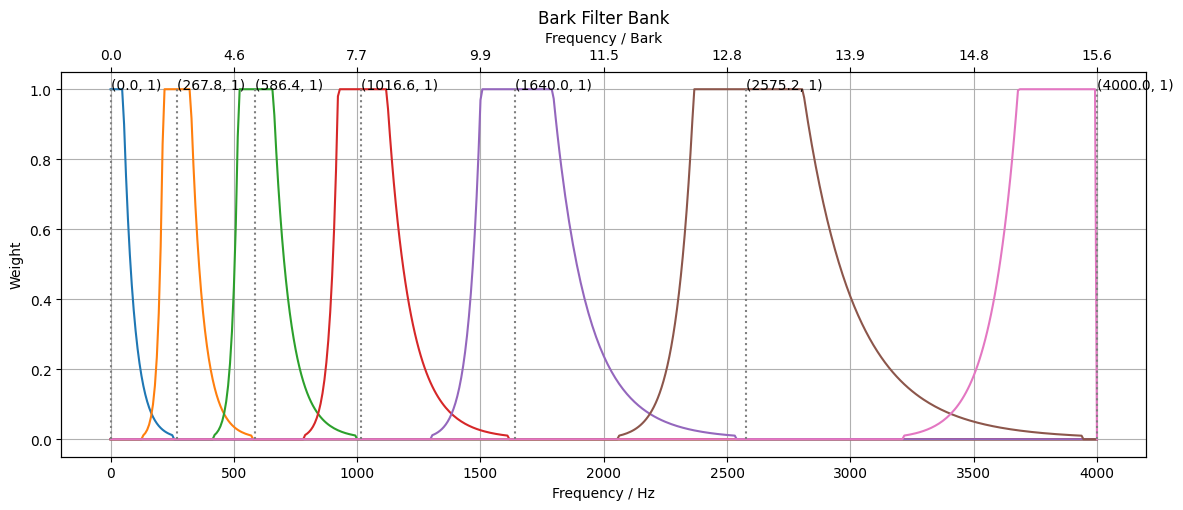

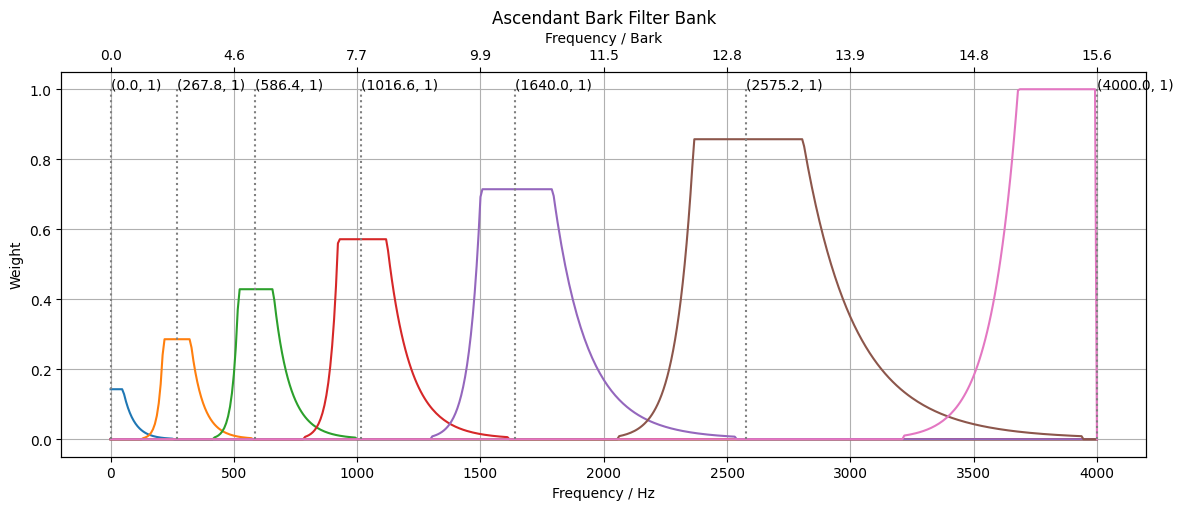

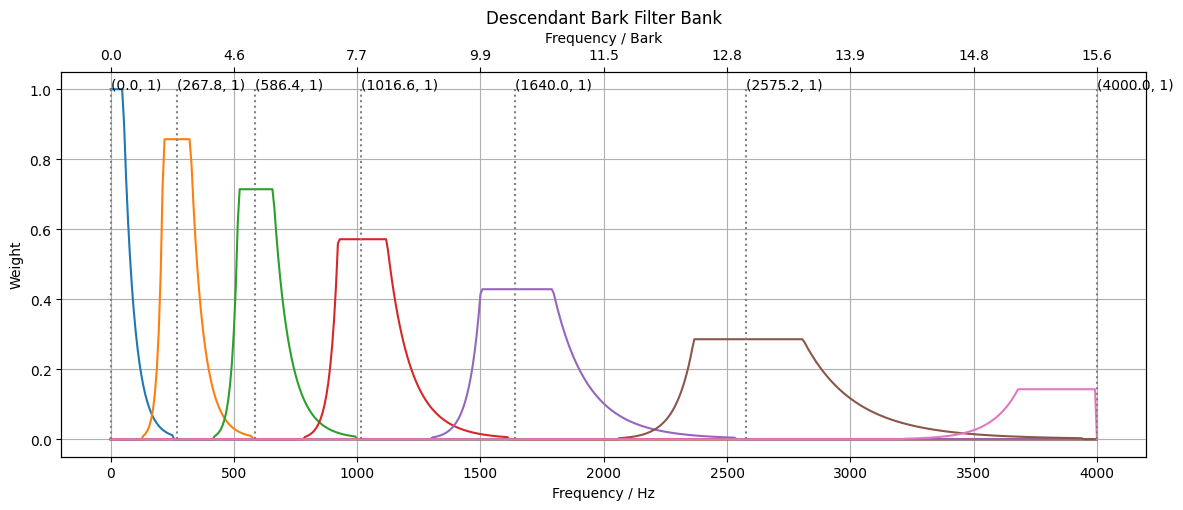

In [1]:
import numpy as np
from spafe.utils.converters import bark2hz
from spafe.utils.vis import show_fbanks
from spafe.fbanks.bark_fbanks import bark_filter_banks

# 初始化参数
fs = 8000
nfilt = 7
nfft = 1024
low_freq = 0
high_freq = fs / 2

# 计算x轴的频率
bhz_freqs = np.linspace(low_freq, high_freq, nfft // 2 + 1)

# 通过for循环计算不同 scale 取值的 Bark 滤波器结果
for scale, label in [("constant", ""), ("ascendant", "Ascendant "), ("descendant", "Descendant ")]:
    # 计算 Bark 滤波器组
    bark_fbank_mat, bark_freqs = bark_filter_banks(
        nfilts=nfilt,
        nfft=nfft,
        fs=fs,
        low_freq=low_freq,
        high_freq=high_freq,
        scale=scale
    )

    # 绘制滤波器组
    show_fbanks(
        bark_fbank_mat,
        [bark2hz(freq) for freq in bark_freqs],
        bhz_freqs,
        label + "Bark Filter Bank",
        ylabel="Weight",
        x1label="Frequency / Hz",
        x2label="Frequency / Bark",
        figsize=(14, 5),
        fb_type="bark",
    )